In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import joblib

In [52]:
df = pd.read_csv('C:/Users/hp/Documents/deployment/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [54]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [55]:
unique_data = df['Drive wheels'].unique()
print(len(unique_data))

3


In [56]:
df = df.drop(columns=["Color","Model","Mileage","ID","Levy","Airbags","Leather interior","Doors"])

In [57]:
df.columns

Index(['Price', 'Manufacturer', 'Prod. year', 'Category', 'Fuel type',
       'Engine volume', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel'],
      dtype='object')

In [58]:
le = LabelEncoder()
df['Gear box type'] = le.fit_transform(df['Gear box type'])
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Prod. year'] = le.fit_transform(df['Prod. year'])
df['Engine volume'] = le.fit_transform(df['Engine volume'])
df['Category'] = le.fit_transform(df['Category'])
df['Fuel type'] = le.fit_transform(df['Fuel type'])
df['Drive wheels'] = le.fit_transform(df['Drive wheels'])
df['Wheel'] = le.fit_transform(df['Wheel'])

In [59]:
df.head()

,Price,Manufacturer,Prod. year,Category,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Wheel
0,13328,32,43,4,2,63,6.0,0,0,0
1,16621,8,44,4,5,56,6.0,2,0,0
2,8467,21,39,3,5,22,4.0,3,1,1
3,3607,16,44,4,2,46,4.0,0,0,0
4,11726,21,47,3,5,22,4.0,0,1,0


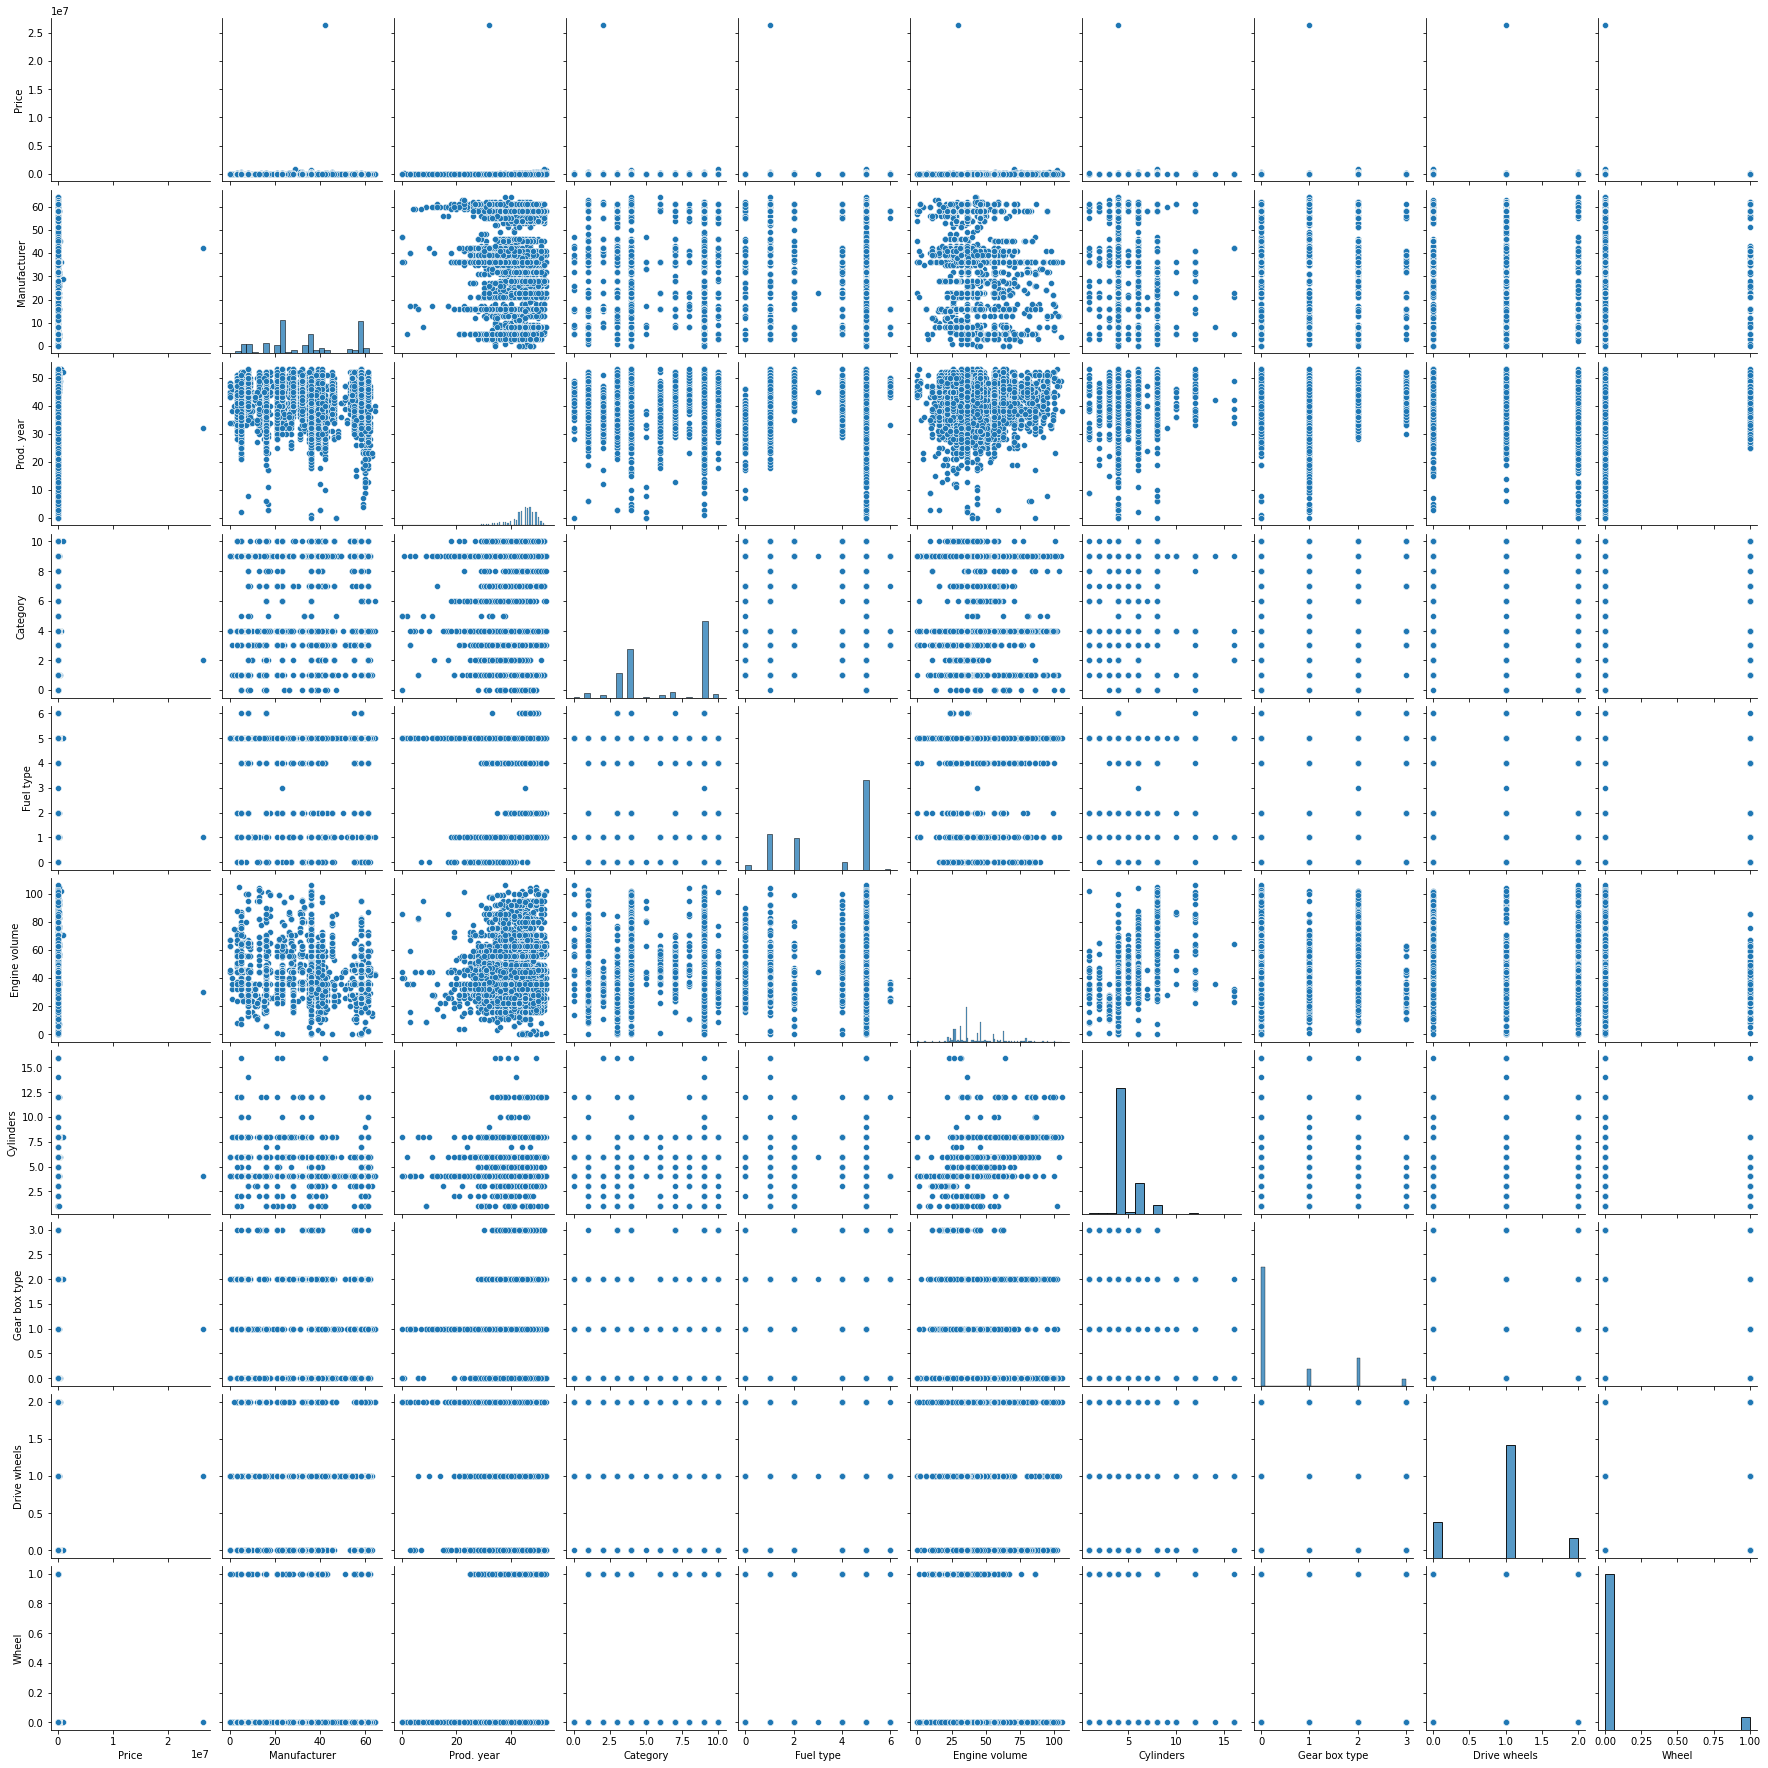

In [10]:
sns.pairplot(df)

In [60]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-0.0274322 , -0.06082842, -0.16710271, ..., -0.59817109,
        -1.6005244 , -0.28912196],
       [-0.01015303, -1.41172317,  0.01326733, ...,  1.63251947,
        -1.6005244 , -0.28912196],
       [-0.05293904, -0.67998851, -0.88858286, ...,  2.74786476,
         0.16047353,  3.45874804],
       ...,
       [ 0.03962755, -0.56741395, -0.16710271, ..., -0.59817109,
         0.16047353, -0.28912196],
       [-0.06939439, -1.41172317, -0.70821282, ..., -0.59817109,
         0.16047353, -0.28912196],
       [-0.09490123, -0.56741395,  0.19363737, ..., -0.59817109,
         0.16047353, -0.28912196]])

In [61]:
df['Price']

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64

In [62]:
df.duplicated().sum()

4880

In [64]:
df.drop_duplicates()

,Price,Manufacturer,Prod. year,Category,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Wheel
0,13328,32,43,4,2,63,6.0,0,0,0
1,16621,8,44,4,5,56,6.0,2,0,0
2,8467,21,39,3,5,22,4.0,3,1,1
3,3607,16,44,4,2,46,4.0,0,0,0
4,11726,21,47,3,5,22,4.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
19226,7840,41,36,9,5,56,6.0,2,2,1
19230,470,58,44,3,2,32,4.0,0,1,0
19232,8467,36,32,1,0,37,4.0,1,2,0
19233,15681,23,44,9,5,44,4.0,2,1,0


In [65]:
df.isna().sum()

Price            0
Manufacturer     0
Prod. year       0
Category         0
Fuel type        0
Engine volume    0
Cylinders        0
Gear box type    0
Drive wheels     0
Wheel            0
dtype: int64

<AxesSubplot:xlabel='Manufacturer'>

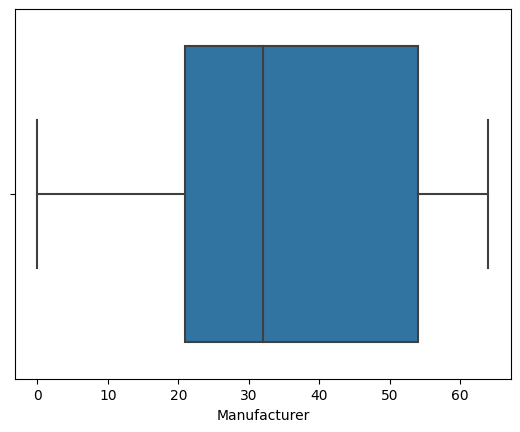

In [66]:
sns.boxplot(x='Manufacturer',data=df)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df[['Manufacturer', 'Prod. year', 'Category', 'Fuel type','Engine volume', 'Cylinders', 'Gear box type','Drive wheels', 'Wheel']]
y = df['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)

In [40]:
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

models = [linear_regression,decision_tree,random_forest]

In [43]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mean_score = r2_score(y_test,y_pred)
    print(f'This {model} model has a score of {mean_score}')

This LinearRegression() model has a score of 0.00046345634294997495
This DecisionTreeRegressor() model has a score of 0.0022731599613118325
This RandomForestRegressor() model has a score of 0.0034190375607453527
